# 汇聚层
在处理图像时，希望逐渐降低隐藏表示的空间分辨率、聚集信息，这样随着我们在神经网络中层叠的上升，每个神经元对其敏感的感受野就越大。

机器学习任务通常会跟全局图像的问题有关（例如，“图像是否包含一只猫”），所以最后一层的神经元应该对整个输入的全局敏感。通过逐渐聚合信息，生成越来越粗糙的映射，最终实现学习全局表示的目标，同时将卷积图层的所有优势保留在中间层。

池化层，具有双重目的：降低卷积层对位置的敏感性，同时降低对空间降采样表示的敏感性。

## 最大汇聚层和平均汇聚层
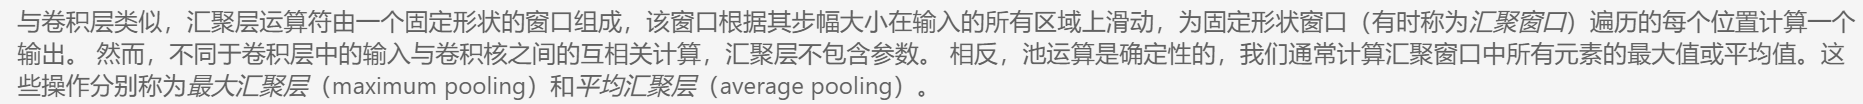

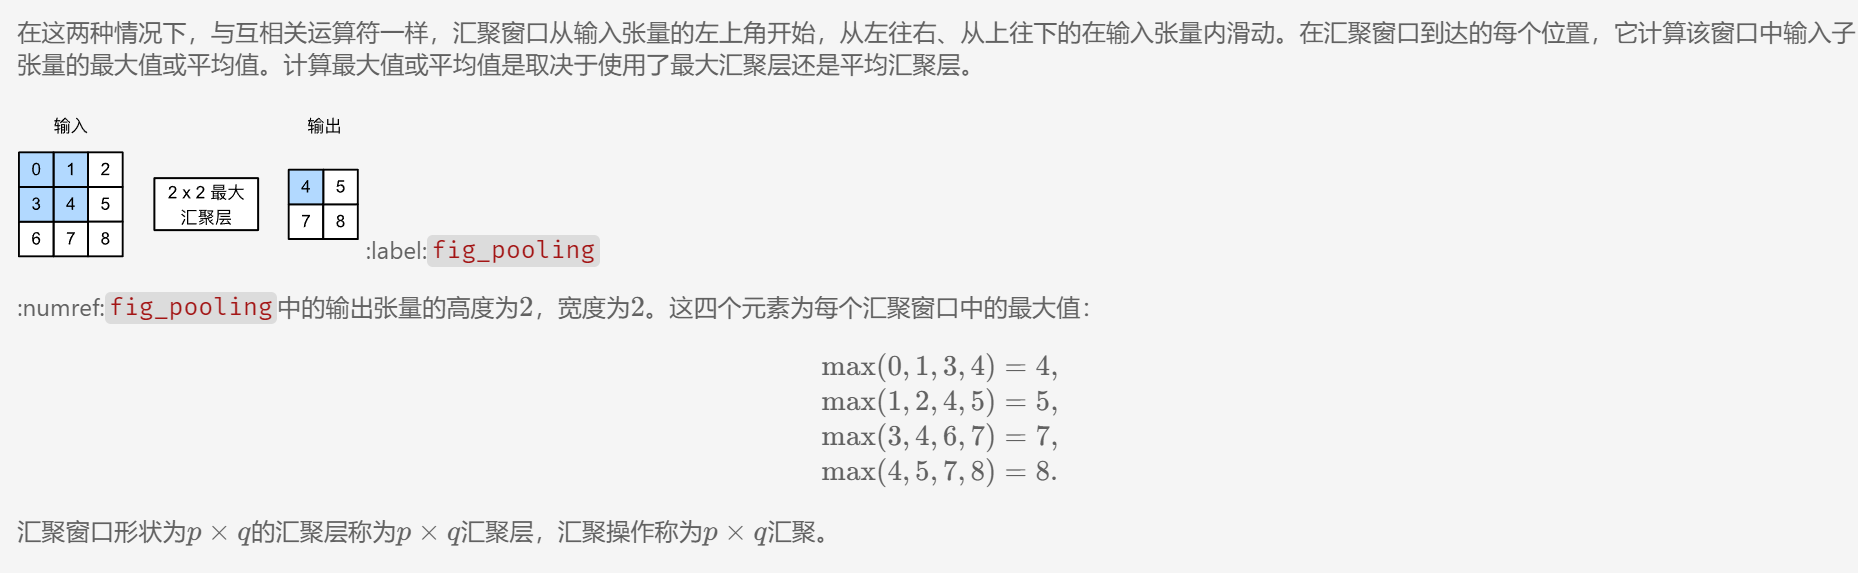

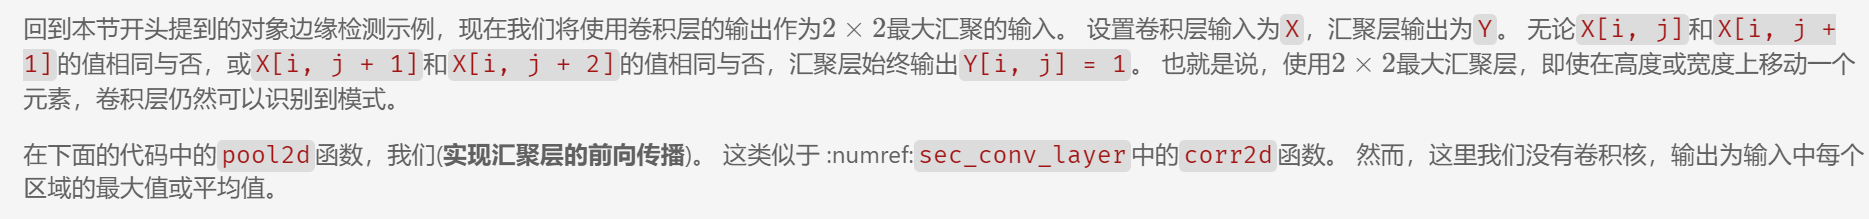

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
def pool2d(X, pool_size, mode="max"):
    p_h, p_w = pool_size
    Y = torch.zeros((X.shape[0] - p_h + 1, X.shape[1] - p_w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            if mode == "max":
                Y[i, j] = X[i: i + p_h, j: j + p_w].max()
            elif mode == 'avg':
                Y[i, j] = X[i: i + p_h, j: j + p_w].mean()
    return Y

输入张量`X`，**验证二维最大汇聚层的输出**

In [3]:
X = torch.tensor([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
pool2d(X, (2, 2))

tensor([[4., 5.],
        [7., 8.]])

还可以验证**平均汇聚层**

In [4]:
pool2d(X, (2, 2), 'avg')

tensor([[2., 3.],
        [5., 6.]])

## 填充和步幅
与卷积层一样，汇聚层也可以改变输出形状。用填充和步幅

In [5]:
X = torch.arange(16, dtype=torch.float32).reshape((1, 1, 4, 4))
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]]]])

默认情况下，**(深度学习框架中的步幅与汇聚窗口的大小相同)**。因此，如果我们使用形状为`(3, 3)`的汇聚窗口，那么默认情况下，我们得到的步幅形状为`(3, 3)`。

In [6]:
pool2d = nn.MaxPool2d(3)
pool2d(X)

tensor([[[[10.]]]])

填充和步幅可以手动设定。

In [7]:
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]]]])

当然，可以设定任意大小的矩形汇聚窗口，并分别设定填充和步幅的高度和宽度。

In [8]:
pool2d = nn.MaxPool2d((2, 3), stride=(2, 3), padding=(0, 1))
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]]]])

## 多个通道
在处理多通道输入数据的时候。**汇聚层在每个输入通道上单独运算**， 而不是像卷积层一样在通道上对输入进行汇总。这意味着汇聚层的输出通道数与输入通道数相同。

In [9]:
X = torch.cat((X, X + 1), 1)
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]],

         [[ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.],
          [ 9., 10., 11., 12.],
          [13., 14., 15., 16.]]]])

池化后的输出通道的数量仍是2.

In [10]:
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]],

         [[ 6.,  8.],
          [14., 16.]]]])